In [1]:
"""
-   The jupyter script is used to carry out the analysis of group runs
-   This is an ETL process: extract (from database), transform (preprocessing techniques), load (numPy arrays)
-   The average of all scans in music therapy group and control group was used to develop the spectograms
-   Statistical analysis:   no rolling wondow applied as only participant scans were used
                            therefore, we have 6 music therapy scans and 5 control scans
"""

'\n-   The jupyter script is used to carry out the analysis of group runs\n-   This is an ETL process: extract (from database), transform (preprocessing techniques), load (numPy arrays)\n-   The average of all scans in music therapy group and control group was used to develop the spectograms\n-   Statistical analysis:   no rolling wondow applied as only participant scans were used\n                            therefore, we have 6 music therapy scans and 5 control scans\n'

In [2]:
from helper import*
from params import*

In [3]:
"extract EEG scans from database"
table_names = allSQLTableNames(hostName,userName,userPassword,databaseName)
tables = multiSQLTablesToDataframes(hostName,userName,userPassword,databaseName,table_names)
input = multiTransformTableToRawEEG(tables,fs,collection_time,fs_setting)
allRawEEG = input[0]
time_s = input[1]

MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
MySQL Database connection successful
M

In [4]:
"""
Index of filename per group per task for both the music therapy and control group
coding example:
                MT11 = MUSIC THERAPY (GROUP 1,TASK 1)
                CT11 = CONTROL (GROUP 1,TASK 1)
"""
#   index of filename per group per task for the music therapy group
idx_MT11 = list(mit.locate(table_names, lambda x: x in musicTherapyGroup_1[0]))
idx_MT12 = list(mit.locate(table_names, lambda x: x in musicTherapyGroup_1[1]))
idx_MT13 = list(mit.locate(table_names, lambda x: x in musicTherapyGroup_1[2]))
idx_MT21 = list(mit.locate(table_names, lambda x: x in musicTherapyGroup_2[0]))
idx_MT22 = list(mit.locate(table_names, lambda x: x in musicTherapyGroup_2[1]))
idx_MT23 = list(mit.locate(table_names, lambda x: x in musicTherapyGroup_2[2]))
#  index of filename per group per task for the control group
idx_CT11 = list(mit.locate(table_names, lambda x: x in controlGroup_1[0]))
idx_CT12 = list(mit.locate(table_names, lambda x: x in controlGroup_1[1]))
idx_CT13 = list(mit.locate(table_names, lambda x: x in controlGroup_1[2]))
idx_CT21 = list(mit.locate(table_names, lambda x: x in controlGroup_2[0]))  
idx_CT22 = list(mit.locate(table_names, lambda x: x in controlGroup_2[1]))
idx_CT23 = list(mit.locate(table_names, lambda x: x in controlGroup_2[2]))

In [5]:
"""
 - Extract scans per participant for both the music therapy and control group
 - Reduce the number of participants in the music therapy group to match that of the control group
"""
MT11 = allRawEEG[idx_MT11]
MT11 = MT11[:-1,:,:]
MT12 = allRawEEG[idx_MT12]
MT12 = MT12[:-1,:,:]
MT13 = allRawEEG[idx_MT13]
MT13 = MT13[:-1,:,:]
MT21 = allRawEEG[idx_MT21]
MT21 = MT21[:-1,:,:]
MT22 = allRawEEG[idx_MT22]
MT22 = MT22[:-1,:,:]
MT23 = allRawEEG[idx_MT23]
MT23 = MT23[:-1,:,:]
CT11 = allRawEEG[idx_CT11]
CT12 = allRawEEG[idx_CT12]
CT13 = allRawEEG[idx_CT13]
CT21 = allRawEEG[idx_CT21]
CT22 = allRawEEG[idx_CT22]
CT23 = allRawEEG[idx_CT23]

In [6]:
"Compute DWT analysis on the averaged raw EEG data"
#   compute dwt for music therapy group
dwt_MT11,dwt_MT12,dwt_MT13,dwt_MT21,dwt_MT22,dwt_MT23 = [],[],[],[],[],[]
dwt_CT11,dwt_CT12,dwt_CT13,dwt_CT21,dwt_CT22,dwt_CT23 = [],[],[],[],[],[]
for i in range(len(MT11)):
    dwt_MT11.append(multiChannelDWT(MT11[i,:,:],time_s,wavelet))
    dwt_MT12.append(multiChannelDWT(MT12[i,:,:],time_s,wavelet))
    dwt_MT13.append(multiChannelDWT(MT13[i,:,:],time_s,wavelet))
    dwt_MT21.append(multiChannelDWT(MT21[i,:,:],time_s,wavelet))
    dwt_MT22.append(multiChannelDWT(MT22[i,:,:],time_s,wavelet))
    dwt_MT23.append(multiChannelDWT(MT23[i,:,:],time_s,wavelet))
dwt_MT11 = np.array(dwt_MT11)
dwt_MT12 = np.array(dwt_MT12)
dwt_MT13 = np.array(dwt_MT13)
dwt_MT21 = np.array(dwt_MT21)
dwt_MT22 = np.array(dwt_MT22)
dwt_MT23 = np.array(dwt_MT23)
for j in range(len(CT11)):
    dwt_CT11.append(multiChannelDWT(CT11[j,:,:],time_s,wavelet))
    dwt_CT12.append(multiChannelDWT(CT12[j,:,:],time_s,wavelet))
    dwt_CT13.append(multiChannelDWT(CT13[j,:,:],time_s,wavelet))
    dwt_CT21.append(multiChannelDWT(CT21[j,:,:],time_s,wavelet))
    dwt_CT22.append(multiChannelDWT(CT22[j,:,:],time_s,wavelet))
    dwt_CT23.append(multiChannelDWT(CT23[j,:,:],time_s,wavelet))
dwt_CT11 = np.array(dwt_CT11)
dwt_CT12 = np.array(dwt_CT12)
dwt_CT13 = np.array(dwt_CT13)
dwt_CT21 = np.array(dwt_CT21)
dwt_CT22 = np.array(dwt_CT22)
dwt_CT23 = np.array(dwt_CT23)

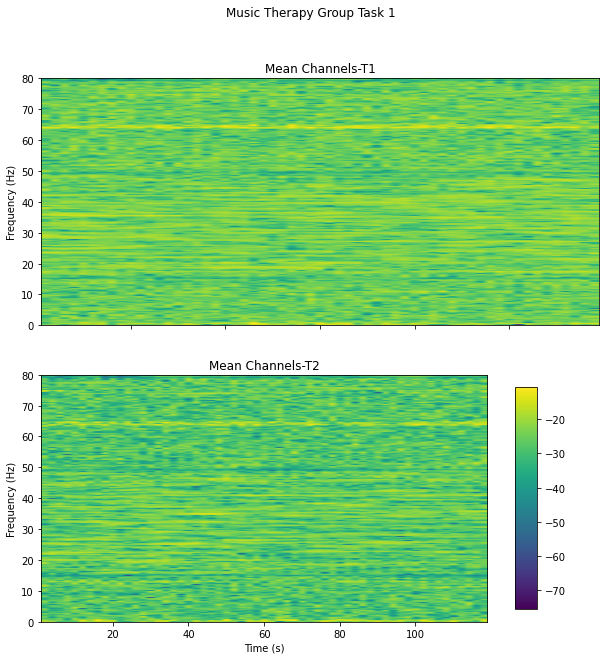

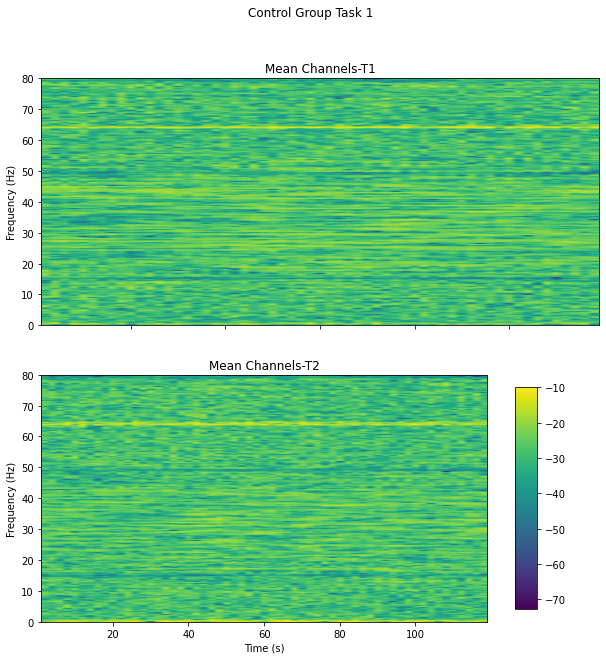

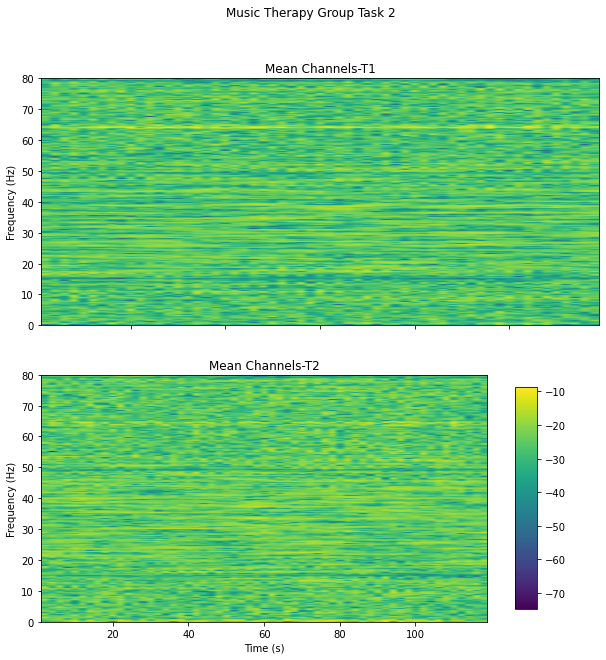

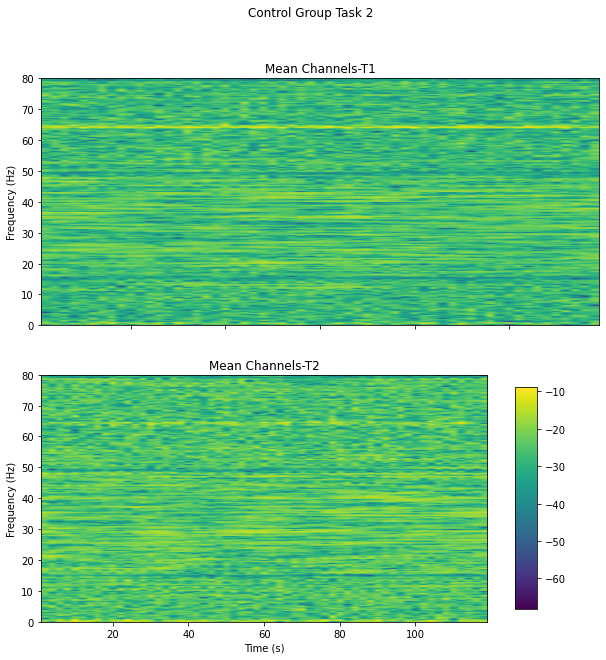

In [7]:
"notch filter the dwt output files"
noc=filters()
notch_MT11,notch_MT12,notch_MT13,notch_MT21,notch_MT22,notch_MT23 = [],[],[],[],[],[]
notch_CT11,notch_CT12,notch_CT13,notch_CT21,notch_CT22,notch_CT23 = [],[],[],[],[],[]
for i in range(len(dwt_MT11)):
    notch_MT11.append(noc.notch(dwt_MT11[i,:,:],line,fs,Q))
    notch_MT12.append(noc.notch(dwt_MT12[i,:,:],line,fs,Q))
    notch_MT13.append(noc.notch(dwt_MT13[i,:,:],line,fs,Q))
    notch_MT21.append(noc.notch(dwt_MT21[i,:,:],line,fs,Q))
    notch_MT22.append(noc.notch(dwt_MT22[i,:,:],line,fs,Q))
    notch_MT23.append(noc.notch(dwt_MT23[i,:,:],line,fs,Q))
notch_MT11 = np.array(notch_MT11)
notch_MT12 = np.array(notch_MT12)
notch_MT13 = np.array(notch_MT13)
notch_MT21 = np.array(notch_MT21)
notch_MT22 = np.array(notch_MT22)
notch_MT23 = np.array(notch_MT23)
for j in range(len(dwt_CT11)):
    notch_CT11.append(noc.notch(dwt_CT11[j,:,:],line,fs,Q))
    notch_CT12.append(noc.notch(dwt_CT12[j,:,:],line,fs,Q))
    notch_CT13.append(noc.notch(dwt_CT13[j,:,:],line,fs,Q))
    notch_CT21.append(noc.notch(dwt_CT21[j,:,:],line,fs,Q))
    notch_CT22.append(noc.notch(dwt_CT22[j,:,:],line,fs,Q))
    notch_CT23.append(noc.notch(dwt_CT23[j,:,:],line,fs,Q))
notch_CT11 = np.array(notch_CT11)
notch_CT12 = np.array(notch_CT12)
notch_CT13 = np.array(notch_CT13)
notch_CT21 = np.array(notch_CT21)
notch_CT22 = np.array(notch_CT22)
notch_CT23 = np.array(notch_CT23)

"Develop spectogram plot"
mean_noc_MT11 = np.mean(notch_MT11.reshape(notch_MT11.shape[0],notch_MT11.shape[2],notch_MT11.shape[1]),axis=0).T
mean_noc_MT12 = np.mean(notch_MT12.reshape(notch_MT12.shape[0],notch_MT12.shape[2],notch_MT12.shape[1]),axis=0).T
mean_noc_MT21 = np.mean(notch_MT21.reshape(notch_MT21.shape[0],notch_MT21.shape[2],notch_MT21.shape[1]),axis=0).T
mean_noc_MT22 = np.mean(notch_MT22.reshape(notch_MT22.shape[0],notch_MT22.shape[2],notch_MT22.shape[1]),axis=0).T
mean_noc_CT11 = np.mean(notch_CT11.reshape(notch_CT11.shape[0],notch_CT11.shape[2],notch_CT11.shape[1]),axis=0).T
mean_noc_CT12 = np.mean(notch_CT12.reshape(notch_CT12.shape[0],notch_CT12.shape[2],notch_CT12.shape[1]),axis=0).T
mean_noc_CT21 = np.mean(notch_CT21.reshape(notch_CT21.shape[0],notch_CT21.shape[2],notch_CT21.shape[1]),axis=0).T
mean_noc_CT22 = np.mean(notch_CT22.reshape(notch_CT22.shape[0],notch_CT22.shape[2],notch_CT22.shape[1]),axis=0).T
mean_noc_MT11_channels = np.mean(mean_noc_MT11,axis=1)
mean_noc_MT11_channels = mean_noc_MT11_channels.reshape(len(mean_noc_MT11_channels),1)
mean_noc_MT12_channels = np.mean(mean_noc_MT12,axis=1)
mean_noc_MT12_channels = mean_noc_MT12_channels.reshape(len(mean_noc_MT12_channels),1)
mean_noc_MT21_channels = np.mean(mean_noc_MT21,axis=1)
mean_noc_MT21_channels = mean_noc_MT21_channels.reshape(len(mean_noc_MT21_channels),1)
mean_noc_MT22_channels = np.mean(mean_noc_MT22,axis=1)
mean_noc_MT22_channels = mean_noc_MT22_channels.reshape(len(mean_noc_MT22_channels),1)
mean_noc_CT11_channels = np.mean(mean_noc_CT11,axis=1)
mean_noc_CT11_channels = mean_noc_CT11_channels.reshape(len(mean_noc_CT11_channels),1)
mean_noc_CT12_channels = np.mean(mean_noc_CT12,axis=1)
mean_noc_CT12_channels = mean_noc_CT12_channels.reshape(len(mean_noc_CT12_channels),1)
mean_noc_CT21_channels = np.mean(mean_noc_CT21,axis=1)
mean_noc_CT21_channels = mean_noc_CT21_channels.reshape(len(mean_noc_CT21_channels),1)
mean_noc_CT22_channels = np.mean(mean_noc_CT22,axis=1)
mean_noc_CT22_channels = mean_noc_CT22_channels.reshape(len(mean_noc_CT22_channels),1)
#spectogramPlot((np.hstack((mean_noc_MT11,mean_noc_MT21))),fs,nfft,noverlap,(20,10),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Music Therapy Group Task 1: T1 v T2')
#spectogramPlot((np.hstack((mean_noc_CT11,mean_noc_CT21))),fs,nfft,noverlap,(20,10),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Control Group Task 1: T1 v T2')
#spectogramPlot((np.hstack((mean_noc_MT12,mean_noc_MT22))),fs,nfft,noverlap,(20,10),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Music Therapy Group Task 2: T1 v T2')
#spectogramPlot((np.hstack((mean_noc_CT12,mean_noc_CT22))),fs,nfft,noverlap,(20,10),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Control Group Task 2: T1 v T2')
spectogramPlot((np.hstack((mean_noc_MT11_channels,mean_noc_MT12_channels))),fs,nfft,noverlap,(10,10),['Mean Channels-T1','Mean Channels-T2'],'Music Therapy Group Task 1')
spectogramPlot((np.hstack((mean_noc_CT11_channels,mean_noc_CT12_channels))),fs,nfft,noverlap,(10,10),['Mean Channels-T1','Mean Channels-T2'],'Control Group Task 1')
spectogramPlot((np.hstack((mean_noc_MT21_channels,mean_noc_MT22_channels))),fs,nfft,noverlap,(10,10),['Mean Channels-T1','Mean Channels-T2'],'Music Therapy Group Task 2')
spectogramPlot((np.hstack((mean_noc_CT21_channels,mean_noc_CT22_channels))),fs,nfft,noverlap,(10,10),['Mean Channels-T1','Mean Channels-T2'],'Control Group Task 2')


In [8]:
"Band Pass filter the notch filtered data"
"""
lowcut = 0.1
highcut = 100
bp = filters()
bp_MT11,bp_MT12,bp_MT13,bp_MT21,bp_MT22,bp_MT23 = [],[],[],[],[],[]
bp_CT11,bp_CT12,bp_CT13,bp_CT21,bp_CT22,bp_CT23 = [],[],[],[],[],[]
for i in range(len(notch_MT11)):
    bp_MT11.append(bp.butterBandPass(notch_MT11[i,:,:],lowcut,highcut,fs,order))
    bp_MT12.append(bp.butterBandPass(notch_MT12[i,:,:],lowcut,highcut,fs,order))
    bp_MT13.append(bp.butterBandPass(notch_MT13[i,:,:],lowcut,highcut,fs,order))
    bp_MT21.append(bp.butterBandPass(notch_MT21[i,:,:],lowcut,highcut,fs,order))
    bp_MT22.append(bp.butterBandPass(notch_MT22[i,:,:],lowcut,highcut,fs,order))
    bp_MT23.append(bp.butterBandPass(notch_MT23[i,:,:],lowcut,highcut,fs,order))
bp_MT11 = np.array(bp_MT11)
bp_MT11 = bp_MT11.reshape(bp_MT11.shape[2],bp_MT11.shape[0],bp_MT11.shape[1])
bp_MT12 = np.array(bp_MT12)
bp_MT12 = bp_MT12.reshape(bp_MT12.shape[2],bp_MT12.shape[0],bp_MT12.shape[1])
bp_MT13 = np.array(bp_MT13)
bp_MT13 = bp_MT13.reshape(bp_MT13.shape[2],bp_MT13.shape[0],bp_MT13.shape[1])
bp_MT21 = np.array(bp_MT21)
bp_MT21 = bp_MT21.reshape(bp_MT21.shape[2],bp_MT21.shape[0],bp_MT21.shape[1])
bp_MT22 = np.array(bp_MT22)
bp_MT22 = bp_MT22.reshape(bp_MT22.shape[2],bp_MT22.shape[0],bp_MT22.shape[1])
bp_MT23 = np.array(bp_MT23)
bp_MT23 = bp_MT23.reshape(bp_MT23.shape[2],bp_MT23.shape[0],bp_MT23.shape[1])
for j in range(len(notch_CT11)):
    bp_CT11.append(bp.butterBandPass(notch_CT11[j,:,:],lowcut,highcut,fs,order))
    bp_CT12.append(bp.butterBandPass(notch_CT12[j,:,:],lowcut,highcut,fs,order))
    bp_CT13.append(bp.butterBandPass(notch_CT13[j,:,:],lowcut,highcut,fs,order))
    bp_CT21.append(bp.butterBandPass(notch_CT21[j,:,:],lowcut,highcut,fs,order))
    bp_CT22.append(bp.butterBandPass(notch_CT22[j,:,:],lowcut,highcut,fs,order))
    bp_CT23.append(bp.butterBandPass(notch_CT23[j,:,:],lowcut,highcut,fs,order))
bp_CT11 = np.array(bp_CT11)
bp_CT11 = bp_CT11.reshape(bp_CT11.shape[2],bp_CT11.shape[0],bp_CT11.shape[1])
bp_CT12 = np.array(bp_CT12)
bp_CT12 = bp_CT12.reshape(bp_CT12.shape[2],bp_CT12.shape[0],bp_CT12.shape[1])
bp_CT13 = np.array(bp_CT13)
bp_CT13 = bp_CT13.reshape(bp_CT13.shape[2],bp_CT13.shape[0],bp_CT13.shape[1])
bp_CT21 = np.array(bp_CT21)
bp_CT21 = bp_CT21.reshape(bp_CT21.shape[2],bp_CT21.shape[0],bp_CT21.shape[1])
bp_CT22 = np.array(bp_CT22)
bp_CT22 = bp_CT22.reshape(bp_CT22.shape[2],bp_CT22.shape[0],bp_CT22.shape[1])
bp_CT23 = np.array(bp_CT23)
bp_CT23 = bp_CT23.reshape(bp_CT23.shape[2],bp_CT23.shape[0],bp_CT23.shape[1])

"Develop spectogram plot"
mean_bp_MT11 = np.mean(bp_MT11.reshape(bp_MT11.shape[1],bp_MT11.shape[0],bp_MT11.shape[2]),axis=0).T
mean_bp_MT12 = np.mean(bp_MT12.reshape(bp_MT12.shape[1],bp_MT12.shape[0],bp_MT12.shape[2]),axis=0).T
mean_bp_MT21 = np.mean(bp_MT21.reshape(bp_MT21.shape[1],bp_MT21.shape[0],bp_MT21.shape[2]),axis=0).T
mean_bp_MT22 = np.mean(bp_MT22.reshape(bp_MT22.shape[1],bp_MT22.shape[0],bp_MT22.shape[2]),axis=0).T
mean_bp_CT11 = np.mean(bp_CT11.reshape(bp_CT11.shape[1],bp_CT11.shape[0],bp_CT11.shape[2]),axis=0).T
mean_bp_CT12 = np.mean(bp_CT12.reshape(bp_CT12.shape[1],bp_CT12.shape[0],bp_CT12.shape[2]),axis=0).T
mean_bp_CT21 = np.mean(bp_CT21.reshape(bp_CT21.shape[1],bp_CT21.shape[0],bp_CT21.shape[2]),axis=0).T
mean_bp_CT22 = np.mean(bp_CT22.reshape(bp_CT22.shape[1],bp_CT22.shape[0],bp_CT22.shape[2]),axis=0).T
mean_bp_MT11_channels = np.mean(mean_bp_MT11,axis=1)
mean_bp_MT11_channels = mean_bp_MT11_channels.reshape(len(mean_bp_MT11_channels),1)
mean_bp_MT12_channels = np.mean(mean_bp_MT12,axis=1)
mean_bp_MT12_channels = mean_bp_MT12_channels.reshape(len(mean_bp_MT12_channels),1)
mean_bp_MT21_channels = np.mean(mean_bp_MT21,axis=1)
mean_bp_MT21_channels = mean_bp_MT21_channels.reshape(len(mean_bp_MT21_channels),1)
mean_bp_MT22_channels = np.mean(mean_bp_MT22,axis=1)
mean_bp_MT22_channels = mean_bp_MT22_channels.reshape(len(mean_bp_MT22_channels),1)
mean_bp_CT11_channels = np.mean(mean_bp_CT11,axis=1)
mean_bp_CT11_channels = mean_bp_CT11_channels.reshape(len(mean_bp_CT11_channels),1)
mean_bp_CT12_channels = np.mean(mean_bp_CT12,axis=1)
mean_bp_CT12_channels = mean_bp_CT12_channels.reshape(len(mean_bp_CT12_channels),1)
mean_bp_CT21_channels = np.mean(mean_bp_CT21,axis=1)
mean_bp_CT21_channels = mean_bp_CT21_channels.reshape(len(mean_bp_CT21_channels),1)
mean_bp_CT22_channels = np.mean(mean_bp_CT22,axis=1)
mean_bp_CT22_channels = mean_bp_CT22_channels.reshape(len(mean_bp_CT22_channels),1)

spectogramPlot((np.hstack((mean_bp_MT11,mean_bp_MT21))),fs,nfft,noverlap,(20,10),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Music Therapy Group Task 1: T1 v T2')
spectogramPlot((np.hstack((mean_bp_MT12,mean_bp_MT22))),fs,nfft,noverlap,(20,10),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Music Therapy Group Task 2: T1 v T2')
spectogramPlot((np.hstack((mean_bp_CT11,mean_bp_CT21))),fs,nfft,noverlap,(20,10),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Control Group Task 1: T1 v T2')
spectogramPlot((np.hstack((mean_bp_CT12,mean_bp_CT22))),fs,nfft,noverlap,(20,10),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Control Group Task 2: T1 v T2')
spectogramPlot((np.hstack((mean_bp_MT11_channels,mean_bp_MT21_channels))),fs,nfft,noverlap,(10,10),['Mean Channels-T1','Mean Channels-T2'],'Music Therapy Group Task 1')
spectogramPlot((np.hstack((mean_bp_CT11_channels,mean_bp_CT21_channels))),fs,nfft,noverlap,(10,10),['Mean Channels-T1','Mean Channels-T2'],'Control Group Task 1')
spectogramPlot((np.hstack((mean_bp_MT12_channels,mean_bp_MT22_channels))),fs,nfft,noverlap,(10,10),['Mean Channels-T1','Mean Channels-T2'],'Music Therapy Group Task 2')
spectogramPlot((np.hstack((mean_bp_CT12_channels,mean_bp_CT22_channels))),fs,nfft,noverlap,(10,10),['Mean Channels-T1','Mean Channels-T2'],'Control Group Task 2')
"""

'\nlowcut = 0.1\nhighcut = 100\nbp = filters()\nbp_MT11,bp_MT12,bp_MT13,bp_MT21,bp_MT22,bp_MT23 = [],[],[],[],[],[]\nbp_CT11,bp_CT12,bp_CT13,bp_CT21,bp_CT22,bp_CT23 = [],[],[],[],[],[]\nfor i in range(len(notch_MT11)):\n    bp_MT11.append(bp.butterBandPass(notch_MT11[i,:,:],lowcut,highcut,fs,order))\n    bp_MT12.append(bp.butterBandPass(notch_MT12[i,:,:],lowcut,highcut,fs,order))\n    bp_MT13.append(bp.butterBandPass(notch_MT13[i,:,:],lowcut,highcut,fs,order))\n    bp_MT21.append(bp.butterBandPass(notch_MT21[i,:,:],lowcut,highcut,fs,order))\n    bp_MT22.append(bp.butterBandPass(notch_MT22[i,:,:],lowcut,highcut,fs,order))\n    bp_MT23.append(bp.butterBandPass(notch_MT23[i,:,:],lowcut,highcut,fs,order))\nbp_MT11 = np.array(bp_MT11)\nbp_MT11 = bp_MT11.reshape(bp_MT11.shape[2],bp_MT11.shape[0],bp_MT11.shape[1])\nbp_MT12 = np.array(bp_MT12)\nbp_MT12 = bp_MT12.reshape(bp_MT12.shape[2],bp_MT12.shape[0],bp_MT12.shape[1])\nbp_MT13 = np.array(bp_MT13)\nbp_MT13 = bp_MT13.reshape(bp_MT13.shape[2],

In [9]:
"compute power spectrum of each window per channel"
delta_low = brainwaves['delta'][0]
delta_high = brainwaves['delta'][1]
theta_low = brainwaves['theta'][0]
theta_high = brainwaves['theta'][1]
alpha_low = brainwaves['alpha'][0]
alpha_high = brainwaves['alpha'][1]
beta_low = brainwaves['beta'][0]
beta_high = brainwaves['beta'][1]
gamma_low = brainwaves['gamma'][0]
gamma_high = brainwaves['gamma'][1]

In [10]:

bp_MT11 = notch_MT11.reshape(notch_MT11.shape[2],notch_MT11.shape[0],notch_MT11.shape[1])
bp_MT12 = notch_MT12.reshape(notch_MT12.shape[2],notch_MT12.shape[0],notch_MT12.shape[1])
bp_MT13 = notch_MT13.reshape(notch_MT13.shape[2],notch_MT13.shape[0],notch_MT13.shape[1])
bp_MT21 = notch_MT21.reshape(notch_MT21.shape[2],notch_MT21.shape[0],notch_MT21.shape[1])
bp_MT22 = notch_MT22.reshape(notch_MT22.shape[2],notch_MT22.shape[0],notch_MT22.shape[1])
bp_MT23 = notch_MT23.reshape(notch_MT23.shape[2],notch_MT23.shape[0],notch_MT23.shape[1])
bp_CT11 = notch_CT11.reshape(notch_CT11.shape[2],notch_CT11.shape[0],notch_CT11.shape[1])
bp_CT12 = notch_CT12.reshape(notch_CT12.shape[2],notch_CT12.shape[0],notch_CT12.shape[1])
bp_CT13 = notch_CT13.reshape(notch_CT13.shape[2],notch_CT13.shape[0],notch_CT13.shape[1])
bp_CT21 = notch_CT21.reshape(notch_CT21.shape[2],notch_CT21.shape[0],notch_CT21.shape[1])
bp_CT22 = notch_CT22.reshape(notch_CT22.shape[2],notch_CT22.shape[0],notch_CT22.shape[1])
bp_CT23 = notch_CT23.reshape(notch_CT23.shape[2],notch_CT23.shape[0],notch_CT23.shape[1])



In [11]:
rw_mean_MT11 = bp_MT11
rw_mean_MT12 = bp_MT12
rw_mean_MT13 = bp_MT13
rw_mean_MT21 = bp_MT21
rw_mean_MT22 = bp_MT22
rw_mean_MT23 = bp_MT23
rw_mean_CT11 = bp_CT11
rw_mean_CT12 = bp_CT12
rw_mean_CT13 = bp_CT13
rw_mean_CT21 = bp_CT21
rw_mean_CT22 = bp_CT22
rw_mean_CT23 = bp_CT23

In [12]:
"Compute the average band power for both the music therapy and control group"
#   compute average delta band power for both music therapy and control group
delta_MT11 = averageBandPower(rw_mean_MT11,'3D',fs,delta_low,delta_high,win)
delta_MT12 = averageBandPower(rw_mean_MT12,'3D',fs,delta_low,delta_high,win)
delta_MT13 = averageBandPower(rw_mean_MT13,'3D',fs,delta_low,delta_high,win)
delta_MT21 = averageBandPower(rw_mean_MT21,'3D',fs,delta_low,delta_high,win)
delta_MT22 = averageBandPower(rw_mean_MT22,'3D',fs,delta_low,delta_high,win)
delta_MT23 = averageBandPower(rw_mean_MT23,'3D',fs,delta_low,delta_high,win)
delta_CT11 = averageBandPower(rw_mean_CT11,'3D',fs,delta_low,delta_high,win)
delta_CT12 = averageBandPower(rw_mean_CT12,'3D',fs,delta_low,delta_high,win)
delta_CT13 = averageBandPower(rw_mean_CT13,'3D',fs,delta_low,delta_high,win)
delta_CT21 = averageBandPower(rw_mean_CT21,'3D',fs,delta_low,delta_high,win)
delta_CT22 = averageBandPower(rw_mean_CT22,'3D',fs,delta_low,delta_high,win)
delta_CT23 = averageBandPower(rw_mean_CT23,'3D',fs,delta_low,delta_high,win)

#   compute average theta band power for both music therapy and control group
theta_MT11 = averageBandPower(rw_mean_MT11,'3D',fs,theta_low,theta_high,win)
theta_MT12 = averageBandPower(rw_mean_MT12,'3D',fs,theta_low,theta_high,win)
theta_MT13 = averageBandPower(rw_mean_MT13,'3D',fs,theta_low,theta_high,win)
theta_MT21 = averageBandPower(rw_mean_MT21,'3D',fs,theta_low,theta_high,win)
theta_MT22 = averageBandPower(rw_mean_MT22,'3D',fs,theta_low,theta_high,win)
theta_MT23 = averageBandPower(rw_mean_MT23,'3D',fs,theta_low,theta_high,win)
theta_CT11 = averageBandPower(rw_mean_CT11,'3D',fs,theta_low,theta_high,win)
theta_CT12 = averageBandPower(rw_mean_CT12,'3D',fs,theta_low,theta_high,win)
theta_CT13 = averageBandPower(rw_mean_CT13,'3D',fs,theta_low,theta_high,win)
theta_CT21 = averageBandPower(rw_mean_CT21,'3D',fs,theta_low,theta_high,win)
theta_CT22 = averageBandPower(rw_mean_CT22,'3D',fs,theta_low,theta_high,win)
theta_CT23 = averageBandPower(rw_mean_CT23,'3D',fs,theta_low,theta_high,win)

#   compute average alpha band power for both music therapy and control group
alpha_MT11 = averageBandPower(rw_mean_MT11,'3D',fs,alpha_low,alpha_high,win)
alpha_MT12 = averageBandPower(rw_mean_MT12,'3D',fs,alpha_low,alpha_high,win)
alpha_MT13 = averageBandPower(rw_mean_MT13,'3D',fs,alpha_low,alpha_high,win)
alpha_MT21 = averageBandPower(rw_mean_MT21,'3D',fs,alpha_low,alpha_high,win)
alpha_MT22 = averageBandPower(rw_mean_MT22,'3D',fs,alpha_low,alpha_high,win)
alpha_MT23 = averageBandPower(rw_mean_MT23,'3D',fs,alpha_low,alpha_high,win)
alpha_CT11 = averageBandPower(rw_mean_CT11,'3D',fs,alpha_low,alpha_high,win)
alpha_CT12 = averageBandPower(rw_mean_CT12,'3D',fs,alpha_low,alpha_high,win)
alpha_CT13 = averageBandPower(rw_mean_CT13,'3D',fs,alpha_low,alpha_high,win)
alpha_CT21 = averageBandPower(rw_mean_CT21,'3D',fs,alpha_low,alpha_high,win)
alpha_CT22 = averageBandPower(rw_mean_CT22,'3D',fs,alpha_low,alpha_high,win)
alpha_CT23 = averageBandPower(rw_mean_CT23,'3D',fs,alpha_low,alpha_high,win)

#   compute average beta band power for both music therapy and control group
beta_MT11 = averageBandPower(rw_mean_MT11,'3D',fs,beta_low,beta_high,win)
beta_MT12 = averageBandPower(rw_mean_MT12,'3D',fs,beta_low,beta_high,win)
beta_MT13 = averageBandPower(rw_mean_MT13,'3D',fs,beta_low,beta_high,win)
beta_MT21 = averageBandPower(rw_mean_MT21,'3D',fs,beta_low,beta_high,win)
beta_MT22 = averageBandPower(rw_mean_MT22,'3D',fs,beta_low,beta_high,win)
beta_MT23 = averageBandPower(rw_mean_MT23,'3D',fs,beta_low,beta_high,win)
beta_CT11 = averageBandPower(rw_mean_CT11,'3D',fs,beta_low,beta_high,win)
beta_CT12 = averageBandPower(rw_mean_CT12,'3D',fs,beta_low,beta_high,win)
beta_CT13 = averageBandPower(rw_mean_CT13,'3D',fs,beta_low,beta_high,win)   
beta_CT21 = averageBandPower(rw_mean_CT21,'3D',fs,beta_low,beta_high,win)
beta_CT22 = averageBandPower(rw_mean_CT22,'3D',fs,beta_low,beta_high,win)
beta_CT23 = averageBandPower(rw_mean_CT23,'3D',fs,beta_low,beta_high,win)

#   compute average gamma band power for both music therapy and control group
gamma_MT11 = averageBandPower(rw_mean_MT11,'3D',fs,gamma_low,gamma_high,win)
gamma_MT12 = averageBandPower(rw_mean_MT12,'3D',fs,gamma_low,gamma_high,win)
gamma_MT13 = averageBandPower(rw_mean_MT13,'3D',fs,gamma_low,gamma_high,win)
gamma_MT21 = averageBandPower(rw_mean_MT21,'3D',fs,gamma_low,gamma_high,win)
gamma_MT22 = averageBandPower(rw_mean_MT22,'3D',fs,gamma_low,gamma_high,win)
gamma_MT23 = averageBandPower(rw_mean_MT23,'3D',fs,gamma_low,gamma_high,win)
gamma_CT11 = averageBandPower(rw_mean_CT11,'3D',fs,gamma_low,gamma_high,win)
gamma_CT12 = averageBandPower(rw_mean_CT12,'3D',fs,gamma_low,gamma_high,win)
gamma_CT13 = averageBandPower(rw_mean_CT13,'3D',fs,gamma_low,gamma_high,win)
gamma_CT21 = averageBandPower(rw_mean_CT21,'3D',fs,gamma_low,gamma_high,win)
gamma_CT22 = averageBandPower(rw_mean_CT22,'3D',fs,gamma_low,gamma_high,win)
gamma_CT23 = averageBandPower(rw_mean_CT23,'3D',fs,gamma_low,gamma_high,win)

#   compute average theta to beta ratio for both music therapy and control group
theta_beta_MT11 = theta_MT11/beta_MT11
theta_beta_MT12 = theta_MT12/beta_MT12
theta_beta_MT13 = theta_MT13/beta_MT13
theta_beta_MT21 = theta_MT21/beta_MT21
theta_beta_MT22 = theta_MT22/beta_MT22
theta_beta_MT23 = theta_MT23/beta_MT23
theta_beta_CT11 = theta_CT11/beta_CT11
theta_beta_CT12 = theta_CT12/beta_CT12
theta_beta_CT13 = theta_CT13/beta_CT13
theta_beta_CT21 = theta_CT21/beta_CT21
theta_beta_CT22 = theta_CT22/beta_CT22
theta_beta_CT23 = theta_CT23/beta_CT23
#   compute average alpha to beta ratio for both music therapy and control group
alpha_beta_MT11 = alpha_MT11/beta_MT11
alpha_beta_MT12 = alpha_MT12/beta_MT12
alpha_beta_MT13 = alpha_MT13/beta_MT13
alpha_beta_MT21 = alpha_MT21/beta_MT21
alpha_beta_MT22 = alpha_MT22/beta_MT22
alpha_beta_MT23 = alpha_MT23/beta_MT23
alpha_beta_CT11 = alpha_CT11/beta_CT11
alpha_beta_CT12 = alpha_CT12/beta_CT12
alpha_beta_CT13 = alpha_CT13/beta_CT13
alpha_beta_CT21 = alpha_CT21/beta_CT21
alpha_beta_CT22 = alpha_CT22/beta_CT22
alpha_beta_CT23 = alpha_CT23/beta_CT23

In [13]:
#   compute average delta band power for both music therapy and control group
data_pre = np.vstack((delta_CT11,delta_CT12,delta_CT13,delta_MT11,delta_MT12,delta_MT13,
                    theta_CT11,theta_CT12,theta_CT13,theta_MT11,theta_MT12,theta_MT13,
                    alpha_CT11,alpha_CT12,alpha_CT13,beta_CT11,alpha_MT11,alpha_MT12,alpha_MT13,
                    beta_CT11,beta_CT12,beta_CT13,beta_MT11,beta_MT12,beta_MT13,
                    gamma_CT11,gamma_CT12,gamma_CT13,gamma_MT11,gamma_MT12,gamma_MT13,
                    theta_beta_MT11,theta_beta_MT12,theta_beta_MT13,theta_beta_CT11,theta_beta_CT12,theta_beta_CT13,
                    alpha_beta_MT11,alpha_beta_MT12,alpha_beta_MT13,alpha_beta_CT11,alpha_beta_CT12,alpha_beta_CT13,))

data_post = np.vstack((delta_CT21,delta_CT22,delta_CT23,delta_MT21,delta_MT22,delta_MT23,
                    theta_CT21,theta_CT22,theta_CT23,theta_MT21,theta_MT22,theta_MT23,
                    alpha_CT21,alpha_CT22,alpha_CT23,beta_CT21,alpha_MT21,alpha_MT22,alpha_MT23,
                    beta_CT21,beta_CT22,beta_CT23,beta_MT21,beta_MT22,beta_MT23,
                    gamma_CT21,gamma_CT22,gamma_CT23,gamma_MT21,gamma_MT22,gamma_MT23,
                    theta_beta_MT21,theta_beta_MT22,theta_beta_MT23,theta_beta_CT21,theta_beta_CT22,theta_beta_CT23,
                    alpha_beta_MT21,alpha_beta_MT22,alpha_beta_MT23,alpha_beta_CT21,alpha_beta_CT22,alpha_beta_CT23,))
                    
data_pre = np.hstack((data_pre[:,0],data_pre[:,1],data_pre[:,2],data_pre[:,3]))
data_post = np.hstack((data_post[:,0],data_post[:,1],data_post[:,2],data_post[:,3]))
diff = data_pre - data_post
test_1 = normalityTest(diff)

....Executing Shapiro Wilks Test.......... 

Shapiro Wilks Test: data is not normally distributed, P-Value= 7.708708317573486e-37

....confirming Shapiro Wilks Test non-normality result with D’Agostino’s K^2 test.......

Executing D’Agostino’s K^2 Test...
D’Agostino’s K^2 Test: data is not normally distributed, P-Value= 1.2411184495674328e-118

....confirming D’Agostino’s K^2 Test non-normality result with Anderson-Darling Test.......

Executing Anderson-Darling Test...
Statistic: 90.276
15.000: 0.573, Anderson-Darling Test: data is not normally distributed
10.000: 0.653, Anderson-Darling Test: data is not normally distributed
5.000: 0.783, Anderson-Darling Test: data is not normally distributed
2.500: 0.914, Anderson-Darling Test: data is not normally distributed
1.000: 1.087, Anderson-Darling Test: data is not normally distributed

 Wilcoxon Signed Test utilized to evaluate significance of data


In [14]:
"""
Compute Wilcoxon Signed Test for the difference between the average delta band power for the two groups
Coding Example:
                MT12 = MUSIC THERAPY (GROUP 1,GROUP 2)
                CT12 = CONTROL (GROUP 1,GROUP 2)
"""
test_type = test_1
#   compute paired t-test for the difference between the average delta band power for the two groups
print ('DELTA BAND')
ttest_delta_MT1121 = statTest(test_type,delta_MT11,delta_MT21, show_output=True,variableName='delta_MT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_delta_MT1222 = statTest(test_type,delta_MT12,delta_MT22, show_output=True,variableName='delta_MT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_delta_MT1323 = statTest(test_type,delta_MT13,delta_MT23, show_output=True,variableName='delta_MT1323',channelName=['TP9','AF7','AF8','TP10'])
ttest_delta_CT1121 = statTest(test_type,delta_CT11,delta_CT21, show_output=True,variableName='delta_CT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_delta_CT1222 = statTest(test_type,delta_CT12,delta_CT22, show_output=True,variableName='delta_CT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_delta_CT1323 = statTest(test_type,delta_CT13,delta_CT23, show_output=True,variableName='delta_CT1323',channelName=['TP9','AF7','AF8','TP10'])

#   compute paired t-test for the difference between the average theta band power for the two groups
print ('THETA BAND')
ttest_theta_MT1121 = statTest(test_type,theta_MT11,theta_MT21, show_output=True,variableName='theta_MT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_theta_MT1222 = statTest(test_type,theta_MT12,theta_MT22, show_output=True,variableName='theta_MT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_theta_MT1323 = statTest(test_type,theta_MT13,theta_MT23, show_output=True,variableName='theta_MT1323',channelName=['TP9','AF7','AF8','TP10'])
ttest_theta_CT1121 = statTest(test_type,theta_CT11,theta_CT21, show_output=True,variableName='theta_CT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_theta_CT1222 = statTest(test_type,theta_CT12,theta_CT22, show_output=True,variableName='theta_CT1222',channelName=['TP9','AF7','AF8','TP10'])   
ttest_theta_CT1323 = statTest(test_type,theta_CT13,theta_CT23, show_output=True,variableName='theta_CT1323',channelName=['TP9','AF7','AF8','TP10'])

#   compute paired t-test for the difference between the average alpha band power for the two groups
print ('ALPHA BAND')
ttest_alpha_MT1121 = statTest(test_type,alpha_MT11,alpha_MT21, show_output=True,variableName='alpha_MT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_alpha_MT1222 = statTest(test_type,alpha_MT12,alpha_MT22, show_output=True,variableName='alpha_MT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_alpha_MT1323 = statTest(test_type,alpha_MT13,alpha_MT23, show_output=True,variableName='alpha_MT1323',channelName=['TP9','AF7','AF8','TP10'])
ttest_alpha_CT1121 = statTest(test_type,alpha_CT11,alpha_CT21, show_output=True,variableName='alpha_CT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_alpha_CT1222 = statTest(test_type,alpha_CT12,alpha_CT22, show_output=True,variableName='alpha_CT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_alpha_CT1323 = statTest(test_type,alpha_CT13,alpha_CT23, show_output=True,variableName='alpha_CT1323',channelName=['TP9','AF7','AF8','TP10'])

#   compute paired t-test for the difference between the average beta band power for the two groups
print ('BETA BAND')
ttest_beta_MT1121 = statTest(test_type,beta_MT11,beta_MT21, show_output=True,variableName='beta_MT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_beta_MT1222 = statTest(test_type,beta_MT12,beta_MT22, show_output=True,variableName='beta_MT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_beta_MT1323 = statTest(test_type,beta_MT13,beta_MT23, show_output=True,variableName='beta_MT1323',channelName=['TP9','AF7','AF8','TP10'])
ttest_beta_CT1121 = statTest(test_type,beta_CT11,beta_CT21, show_output=True,variableName='beta_CT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_beta_CT1222 = statTest(test_type,beta_CT12,beta_CT22, show_output=True,variableName='beta_CT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_beta_CT1323 = statTest(test_type,beta_CT13,beta_CT23, show_output=True,variableName='beta_CT1323',channelName=['TP9','AF7','AF8','TP10'])

#   compute paired t-test for the difference between the average gamma band power for the two groups
print ('GAMMA BAND')
ttest_gamma_MT1121 = statTest(test_type,gamma_MT11,gamma_MT21, show_output=True,variableName='gamma_MT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_gamma_MT1222 = statTest(test_type,gamma_MT12,gamma_MT22, show_output=True,variableName='gamma_MT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_gamma_MT1323 = statTest(test_type,gamma_MT13,gamma_MT23, show_output=True,variableName='gamma_MT1323',channelName=['TP9','AF7','AF8','TP10'])
ttest_gamma_CT1121 = statTest(test_type,gamma_CT11,gamma_CT21, show_output=True,variableName='gamma_CT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_gamma_CT1222 = statTest(test_type,gamma_CT12,gamma_CT22, show_output=True,variableName='gamma_CT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_gamma_CT1323 = statTest(test_type,gamma_CT13,gamma_CT23, show_output=True,variableName='gamma_CT1323',channelName=['TP9','AF7','AF8','TP10'])

#   compute paired t-test for the difference between the theta to beta band power for the two groups
print ('THETA TO BETA BAND')
ttest_theta_beta_MT1121 = statTest(test_type,theta_beta_MT11,theta_beta_MT21, show_output=True,variableName='theta_beta_MT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_theta_beta_MT1222 = statTest(test_type,theta_beta_MT12,theta_beta_MT22, show_output=True,variableName='theta_beta_MT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_theta_beta_MT1323 = statTest(test_type,theta_beta_MT13,theta_beta_MT23, show_output=True,variableName='theta_beta_MT1323',channelName=['TP9','AF7','AF8','TP10'])
ttest_theta_beta_CT1121 = statTest(test_type,theta_beta_CT11,theta_beta_CT21, show_output=True,variableName='theta_beta_CT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_theta_beta_CT1222 = statTest(test_type,theta_beta_CT12,theta_beta_CT22, show_output=True,variableName='theta_beta_CT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_theta_beta_CT1323 = statTest(test_type,theta_beta_CT13,theta_beta_CT23, show_output=True,variableName='theta_beta_CT1323',channelName=['TP9','AF7','AF8','TP10'])

#  compute paired t-test for the difference between the alpha to beta band power for the two groups
print ('ALPHA TO BETA BAND')
ttest_alpha_beta_MT1121 = statTest(test_type,alpha_beta_MT11,alpha_beta_MT21, show_output=True,variableName='alpha_beta_MT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_alpha_beta_MT1222 = statTest(test_type,alpha_beta_MT12,alpha_beta_MT22, show_output=True,variableName='alpha_beta_MT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_alpha_beta_MT1323 = statTest(test_type,alpha_beta_MT13,alpha_beta_MT23, show_output=True,variableName='alpha_beta_MT1323',channelName=['TP9','AF7','AF8','TP10'])
ttest_alpha_beta_CT1121 = statTest(test_type,alpha_beta_CT11,alpha_beta_CT21, show_output=True,variableName='alpha_beta_CT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_alpha_beta_CT1222 = statTest(test_type,alpha_beta_CT12,alpha_beta_CT22, show_output=True,variableName='alpha_beta_CT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_alpha_beta_CT1323 = statTest(test_type,alpha_beta_CT13,alpha_beta_CT23, show_output=True,variableName='alpha_beta_CT1323',channelName=['TP9','AF7','AF8','TP10'])


DELTA BAND
delta_MT1121 | TP9 | P-value = 0.3125 | NSD | mean increase
delta_MT1121 | AF7 | P-value = 0.1875 | NSD | mean increase
delta_MT1121 | AF8 | P-value = 0.4375 | NSD | mean increase
delta_MT1121 | TP10 | P-value = 0.3125 | NSD | mean increase


delta_MT1222 | TP9 | P-value = 0.4375 | NSD | mean increase
delta_MT1222 | AF7 | P-value = 0.625 | NSD | mean increase
delta_MT1222 | AF8 | P-value = 0.4375 | NSD | mean increase
delta_MT1222 | TP10 | P-value = 0.4375 | NSD | mean increase


delta_MT1323 | TP9 | P-value = 1.0 | NSD | mean decrease
delta_MT1323 | AF7 | P-value = 0.4375 | NSD | mean decrease
delta_MT1323 | AF8 | P-value = 0.4375 | NSD | mean decrease
delta_MT1323 | TP10 | P-value = 0.125 | NSD | mean decrease


delta_CT1121 | TP9 | P-value = 0.625 | NSD | mean increase
delta_CT1121 | AF7 | P-value = 0.4375 | NSD | mean increase
delta_CT1121 | AF8 | P-value = 1.0 | NSD | mean decrease
delta_CT1121 | TP10 | P-value = 1.0 | NSD | mean increase


delta_CT1222 | TP9 | P-value 

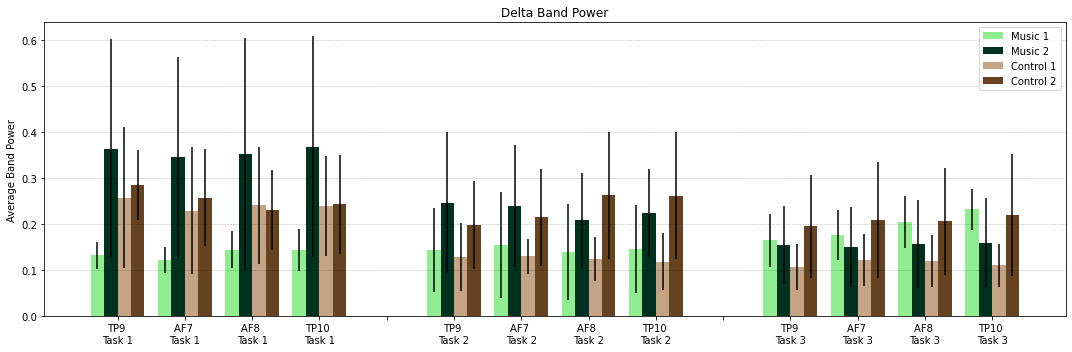

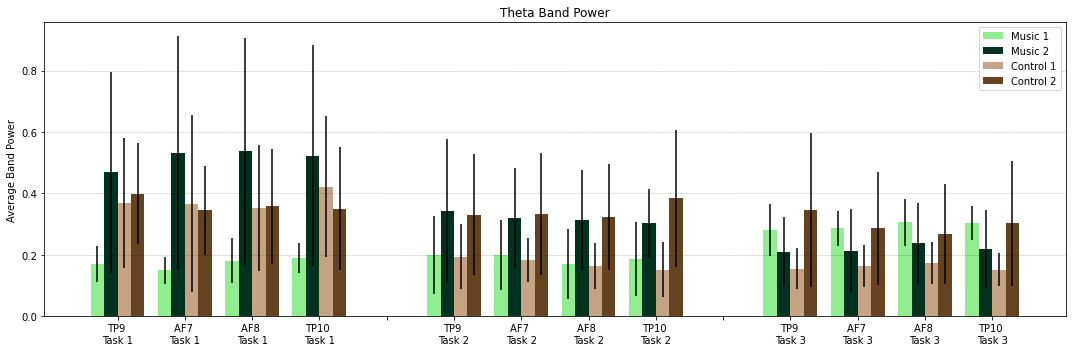

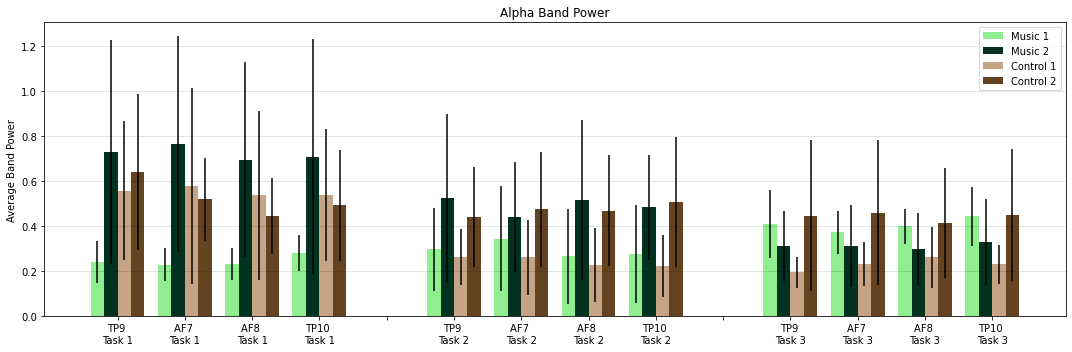

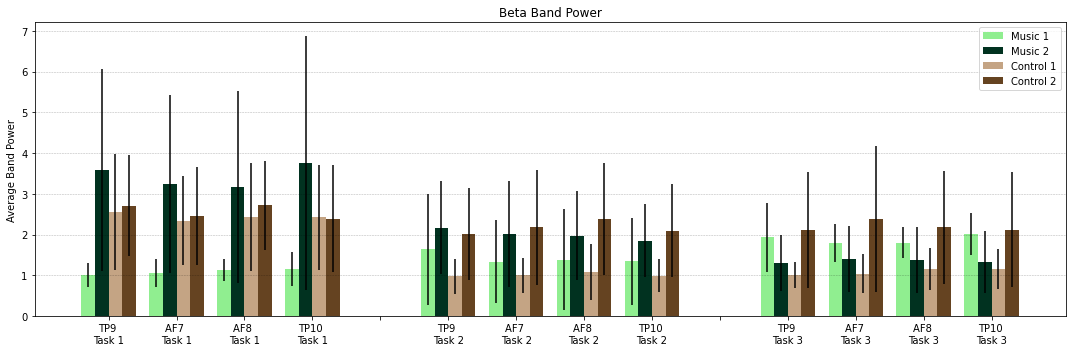

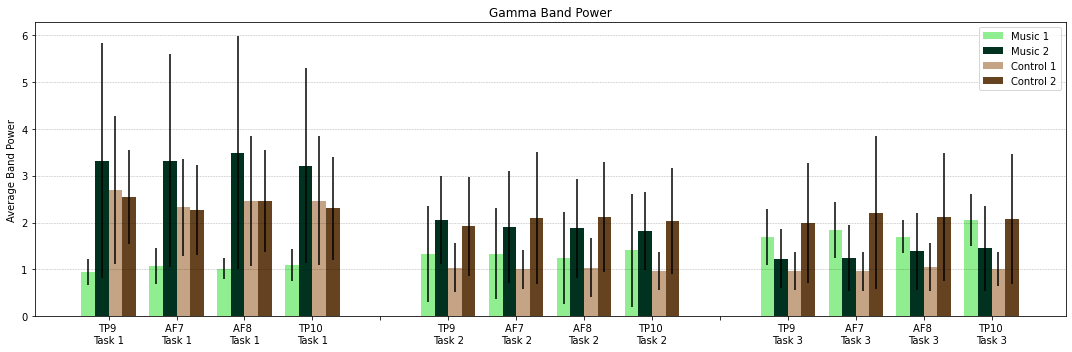

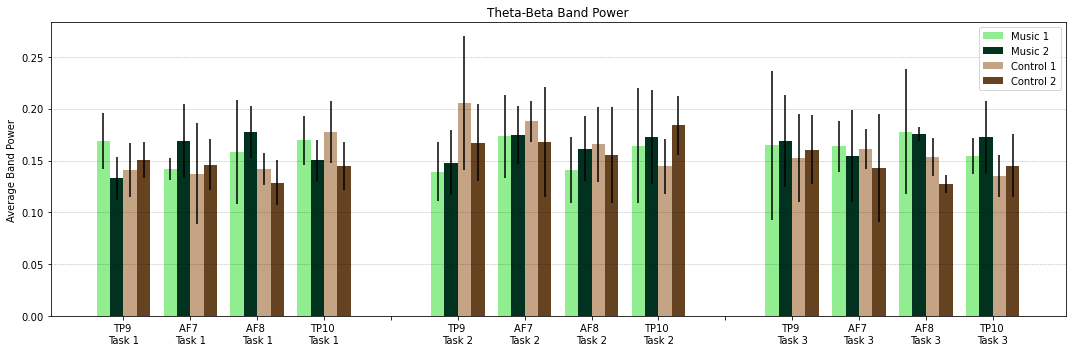

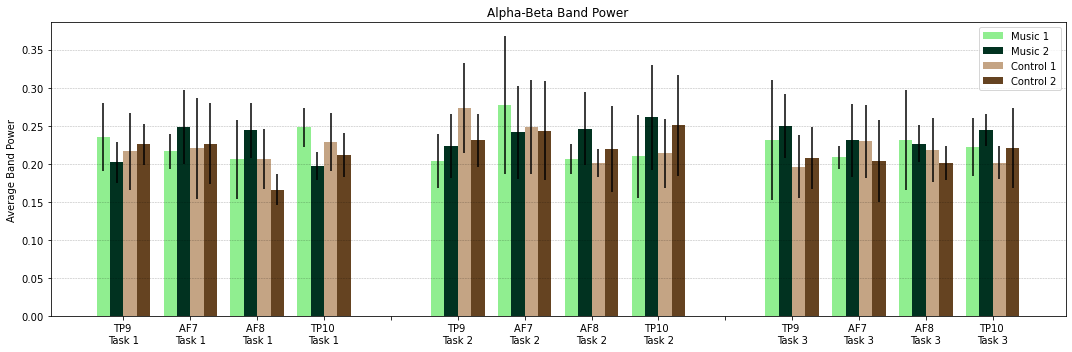

In [15]:
"""
Mean comparisons for bands that showed significant differences between the two groups 
(manually developed based on results from above)
"""

plot_averageBandPower([[delta_MT11,delta_MT12,delta_MT13],[delta_MT21,delta_MT22,delta_MT23]],
                        [[delta_CT11,delta_CT12,delta_CT13],[delta_CT21,delta_CT22,delta_CT23]],
                        ['TP9 \nTask 1','AF7 \nTask 1','AF8 \nTask 1','TP10 \nTask 1','','TP9 \nTask 2',
                        'AF7 \nTask 2','AF8 \nTask 2','TP10 \nTask 2','','TP9 \nTask 3','AF7 \nTask 3',
                        'AF8 \nTask 3','TP10 \nTask 3'],studygroups,(15,5),'Delta Band Power')

plot_averageBandPower([[theta_MT11,theta_MT12,theta_MT13],[theta_MT21,theta_MT22,theta_MT23]],
                        [[theta_CT11,theta_CT12,theta_CT13],[theta_CT21,theta_CT22,theta_CT23]],
                        ['TP9 \nTask 1','AF7 \nTask 1','AF8 \nTask 1','TP10 \nTask 1','','TP9 \nTask 2',
                        'AF7 \nTask 2','AF8 \nTask 2','TP10 \nTask 2','','TP9 \nTask 3','AF7 \nTask 3',
                        'AF8 \nTask 3','TP10 \nTask 3'],studygroups,(15,5),'Theta Band Power')

plot_averageBandPower([[alpha_MT11,alpha_MT12,alpha_MT13],[alpha_MT21,alpha_MT22,alpha_MT23]],
                        [[alpha_CT11,alpha_CT12,alpha_CT13],[alpha_CT21,alpha_CT22,alpha_CT23]],
                        ['TP9 \nTask 1','AF7 \nTask 1','AF8 \nTask 1','TP10 \nTask 1','','TP9 \nTask 2',
                        'AF7 \nTask 2','AF8 \nTask 2','TP10 \nTask 2','','TP9 \nTask 3','AF7 \nTask 3',
                        'AF8 \nTask 3','TP10 \nTask 3'],studygroups,(15,5),'Alpha Band Power')

plot_averageBandPower([[beta_MT11,beta_MT12,beta_MT13],[beta_MT21,beta_MT22,beta_MT23]],
                        [[beta_CT11,beta_CT12,beta_CT13],[beta_CT21,beta_CT22,beta_CT23]],
                        ['TP9 \nTask 1','AF7 \nTask 1','AF8 \nTask 1','TP10 \nTask 1','','TP9 \nTask 2',
                        'AF7 \nTask 2','AF8 \nTask 2','TP10 \nTask 2','','TP9 \nTask 3','AF7 \nTask 3',
                        'AF8 \nTask 3','TP10 \nTask 3'],studygroups,(15,5),'Beta Band Power')

plot_averageBandPower([[gamma_MT11,gamma_MT12,gamma_MT13],[gamma_MT21,gamma_MT22,gamma_MT23]],
                        [[gamma_CT11,gamma_CT12,gamma_CT13],[gamma_CT21,gamma_CT22,gamma_CT23]],
                        ['TP9 \nTask 1','AF7 \nTask 1','AF8 \nTask 1','TP10 \nTask 1','','TP9 \nTask 2',
                        'AF7 \nTask 2','AF8 \nTask 2','TP10 \nTask 2','','TP9 \nTask 3','AF7 \nTask 3',
                        'AF8 \nTask 3','TP10 \nTask 3'],studygroups,(15,5),'Gamma Band Power')
plot_averageBandPower([[theta_beta_MT11,theta_beta_MT12,theta_beta_MT13],[theta_beta_MT21,theta_beta_MT22,theta_beta_MT23]],
                        [[theta_beta_CT11,theta_beta_CT12,theta_beta_CT13],[theta_beta_CT21,theta_beta_CT22,theta_beta_CT23]],
                        ['TP9 \nTask 1','AF7 \nTask 1','AF8 \nTask 1','TP10 \nTask 1','','TP9 \nTask 2',
                        'AF7 \nTask 2','AF8 \nTask 2','TP10 \nTask 2','','TP9 \nTask 3','AF7 \nTask 3',
                        'AF8 \nTask 3','TP10 \nTask 3'],studygroups,(15,5),'Theta-Beta Band Power')
plot_averageBandPower([[alpha_beta_MT11,alpha_beta_MT12,alpha_beta_MT13],[alpha_beta_MT21,alpha_beta_MT22,alpha_beta_MT23]],
                        [[alpha_beta_CT11,alpha_beta_CT12,alpha_beta_CT13],[alpha_beta_CT21,alpha_beta_CT22,alpha_beta_CT23]],  
                        ['TP9 \nTask 1','AF7 \nTask 1','AF8 \nTask 1','TP10 \nTask 1','','TP9 \nTask 2',
                        'AF7 \nTask 2','AF8 \nTask 2','TP10 \nTask 2','','TP9 \nTask 3','AF7 \nTask 3',
                        'AF8 \nTask 3','TP10 \nTask 3'],studygroups,(15,5),'Alpha-Beta Band Power')
                    

In [16]:
"""
delta_TP1TK1_TP9 = np.hstack((delta_MT11[:,0],delta_CT11[:,0]))
delta_TP1TK2_TP9 = np.hstack((delta_MT12[:,0],delta_CT12[:,0]))
delta_TP2TK1_TP9 = np.hstack((delta_MT21[:,0],delta_CT21[:,0]))
delta_TP2TK2_TP9 = np.hstack((delta_MT22[:,0],delta_CT22[:,0]))

delta_TP1TK1_AF7 = np.hstack((delta_MT11[:,1],delta_CT11[:,1]))
delta_TP1TK2_AF7 = np.hstack((delta_MT12[:,1],delta_CT12[:,1]))
delta_TP2TK1_AF7 = np.hstack((delta_MT21[:,1],delta_CT21[:,1]))
delta_TP2TK2_AF7 = np.hstack((delta_MT22[:,1],delta_CT22[:,1]))

delta_TP1TK1_AF8 = np.hstack((delta_MT11[:,2],delta_CT11[:,2]))
delta_TP1TK2_AF8 = np.hstack((delta_MT12[:,2],delta_CT12[:,2]))
delta_TP2TK1_AF8 = np.hstack((delta_MT21[:,2],delta_CT21[:,2]))
delta_TP2TK2_AF8 = np.hstack((delta_MT22[:,2],delta_CT22[:,2]))

delta_TP1TK1_TP10 = np.hstack((delta_MT11[:,3],delta_CT11[:,3]))
delta_TP1TK2_TP10 = np.hstack((delta_MT12[:,3],delta_CT12[:,3]))
delta_TP2TK1_TP10 = np.hstack((delta_MT21[:,3],delta_CT21[:,3]))
delta_TP2TK2_TP10 = np.hstack((delta_MT22[:,3],delta_CT22[:,3]))

delta_TP1TK1_mean = np.mean(np.vstack((delta_TP1TK1_TP9,delta_TP1TK1_AF7,delta_TP1TK1_AF8,delta_TP1TK1_TP10)).T,axis=1)
delta_TP1TK2_mean = np.mean(np.vstack((delta_TP1TK2_TP9,delta_TP1TK2_AF7,delta_TP1TK2_AF8,delta_TP1TK2_TP10)).T,axis=1)
delta_TP2TK1_mean = np.mean(np.vstack((delta_TP2TK1_TP9,delta_TP2TK1_AF7,delta_TP2TK1_AF8,delta_TP2TK1_TP10)).T,axis=1)
delta_TP2TK2_mean = np.mean(np.vstack((delta_TP2TK2_TP9,delta_TP2TK2_AF7,delta_TP2TK2_AF8,delta_TP2TK2_TP10)).T,axis=1)

theta_TP1TK1_TP9 = np.hstack((theta_MT11[:,0],theta_CT11[:,0]))
theta_TP1TK2_TP9 = np.hstack((theta_MT12[:,0],theta_CT12[:,0]))
theta_TP2TK1_TP9 = np.hstack((theta_MT21[:,0],theta_CT21[:,0]))
theta_TP2TK2_TP9 = np.hstack((theta_MT22[:,0],theta_CT22[:,0]))

theta_TP1TK1_AF7 = np.hstack((theta_MT11[:,1],theta_CT11[:,1]))
theta_TP1TK2_AF7 = np.hstack((theta_MT12[:,1],theta_CT12[:,1]))
theta_TP2TK1_AF7 = np.hstack((theta_MT21[:,1],theta_CT21[:,1]))
theta_TP2TK2_AF7 = np.hstack((theta_MT22[:,1],theta_CT22[:,1]))

theta_TP1TK1_AF8 = np.hstack((theta_MT11[:,2],theta_CT11[:,2]))
theta_TP1TK2_AF8 = np.hstack((theta_MT12[:,2],theta_CT12[:,2]))
theta_TP2TK1_AF8 = np.hstack((theta_MT21[:,2],theta_CT21[:,2]))
theta_TP2TK2_AF8 = np.hstack((theta_MT22[:,2],theta_CT22[:,2]))

theta_TP1TK1_TP10 = np.hstack((theta_MT11[:,3],theta_CT11[:,3]))
theta_TP1TK2_TP10 = np.hstack((theta_MT12[:,3],theta_CT12[:,3]))
theta_TP2TK1_TP10 = np.hstack((theta_MT21[:,3],theta_CT21[:,3]))
theta_TP2TK2_TP10 = np.hstack((theta_MT22[:,3],theta_CT22[:,3]))

theta_TP1TK1_mean = np.mean(np.vstack((theta_TP1TK1_TP9,theta_TP1TK1_AF7,theta_TP1TK1_AF8,theta_TP1TK1_TP10)).T,axis=1)
theta_TP1TK2_mean = np.mean(np.vstack((theta_TP1TK2_TP9,theta_TP1TK2_AF7,theta_TP1TK2_AF8,theta_TP1TK2_TP10)).T,axis=1)
theta_TP2TK1_mean = np.mean(np.vstack((theta_TP2TK1_TP9,theta_TP2TK1_AF7,theta_TP2TK1_AF8,theta_TP2TK1_TP10)).T,axis=1)
theta_TP2TK2_mean = np.mean(np.vstack((theta_TP2TK2_TP9,theta_TP2TK2_AF7,theta_TP2TK2_AF8,theta_TP2TK2_TP10)).T,axis=1)

alpha_TP1TK1_TP9 = np.hstack((alpha_MT11[:,0],alpha_CT11[:,0]))
alpha_TP1TK2_TP9 = np.hstack((alpha_MT12[:,0],alpha_CT12[:,0]))
alpha_TP2TK1_TP9 = np.hstack((alpha_MT21[:,0],alpha_CT21[:,0]))
alpha_TP2TK2_TP9 = np.hstack((alpha_MT22[:,0],alpha_CT22[:,0]))

alpha_TP1TK1_AF7 = np.hstack((alpha_MT11[:,1],alpha_CT11[:,1]))
alpha_TP1TK2_AF7 = np.hstack((alpha_MT12[:,1],alpha_CT12[:,1]))
alpha_TP2TK1_AF7 = np.hstack((alpha_MT21[:,1],alpha_CT21[:,1]))
alpha_TP2TK2_AF7 = np.hstack((alpha_MT22[:,1],alpha_CT22[:,1]))

alpha_TP1TK1_AF8 = np.hstack((alpha_MT11[:,2],alpha_CT11[:,2]))
alpha_TP1TK2_AF8 = np.hstack((alpha_MT12[:,2],alpha_CT12[:,2]))
alpha_TP2TK1_AF8 = np.hstack((alpha_MT21[:,2],alpha_CT21[:,2]))
alpha_TP2TK2_AF8 = np.hstack((alpha_MT22[:,2],alpha_CT22[:,2]))

alpha_TP1TK1_TP10 = np.hstack((alpha_MT11[:,3],alpha_CT11[:,3]))
alpha_TP1TK2_TP10 = np.hstack((alpha_MT12[:,3],alpha_CT12[:,3]))
alpha_TP2TK1_TP10 = np.hstack((alpha_MT21[:,3],alpha_CT21[:,3]))
alpha_TP2TK2_TP10 = np.hstack((alpha_MT22[:,3],alpha_CT22[:,3]))

alpha_TP1TK1_mean = np.mean(np.vstack((alpha_TP1TK1_TP9,alpha_TP1TK1_AF7,alpha_TP1TK1_AF8,alpha_TP1TK1_TP10)).T,axis=1)
alpha_TP1TK2_mean = np.mean(np.vstack((alpha_TP1TK2_TP9,alpha_TP1TK2_AF7,alpha_TP1TK2_AF8,alpha_TP1TK2_TP10)).T,axis=1)
alpha_TP2TK1_mean = np.mean(np.vstack((alpha_TP2TK1_TP9,alpha_TP2TK1_AF7,alpha_TP2TK1_AF8,alpha_TP2TK1_TP10)).T,axis=1)
alpha_TP2TK2_mean = np.mean(np.vstack((alpha_TP2TK2_TP9,alpha_TP2TK2_AF7,alpha_TP2TK2_AF8,alpha_TP2TK2_TP10)).T,axis=1)

beta_TP1TK1_TP9 = np.hstack((beta_MT11[:,0],beta_CT11[:,0]))
beta_TP1TK2_TP9 = np.hstack((beta_MT12[:,0],beta_CT12[:,0]))
beta_TP2TK1_TP9 = np.hstack((beta_MT21[:,0],beta_CT21[:,0]))
beta_TP2TK2_TP9 = np.hstack((beta_MT22[:,0],beta_CT22[:,0]))

beta_TP1TK1_AF7 = np.hstack((beta_MT11[:,1],beta_CT11[:,1]))
beta_TP1TK2_AF7 = np.hstack((beta_MT12[:,1],beta_CT12[:,1]))
beta_TP2TK1_AF7 = np.hstack((beta_MT21[:,1],beta_CT21[:,1]))
beta_TP2TK2_AF7 = np.hstack((beta_MT22[:,1],beta_CT22[:,1]))

beta_TP1TK1_AF8 = np.hstack((beta_MT11[:,2],beta_CT11[:,2]))
beta_TP1TK2_AF8 = np.hstack((beta_MT12[:,2],beta_CT12[:,2]))
beta_TP2TK1_AF8 = np.hstack((beta_MT21[:,2],beta_CT21[:,2]))
beta_TP2TK2_AF8 = np.hstack((beta_MT22[:,2],beta_CT22[:,2]))

beta_TP1TK1_TP10 = np.hstack((beta_MT11[:,3],beta_CT11[:,3]))
beta_TP1TK2_TP10 = np.hstack((beta_MT12[:,3],beta_CT12[:,3]))
beta_TP2TK1_TP10 = np.hstack((beta_MT21[:,3],beta_CT21[:,3]))
beta_TP2TK2_TP10 = np.hstack((beta_MT22[:,3],beta_CT22[:,3]))

beta_TP1TK1_mean = np.mean(np.vstack((beta_TP1TK1_TP9,beta_TP1TK1_AF7,beta_TP1TK1_AF8,beta_TP1TK1_TP10)).T,axis=1)
beta_TP1TK2_mean = np.mean(np.vstack((beta_TP1TK2_TP9,beta_TP1TK2_AF7,beta_TP1TK2_AF8,beta_TP1TK2_TP10)).T,axis=1)
beta_TP2TK1_mean = np.mean(np.vstack((beta_TP2TK1_TP9,beta_TP2TK1_AF7,beta_TP2TK1_AF8,beta_TP2TK1_TP10)).T,axis=1)
beta_TP2TK2_mean = np.mean(np.vstack((beta_TP2TK2_TP9,beta_TP2TK2_AF7,beta_TP2TK2_AF8,beta_TP2TK2_TP10)).T,axis=1)

gamma_TP1TK1_TP9 = np.hstack((gamma_MT11[:,0],gamma_CT11[:,0]))
gamma_TP1TK2_TP9 = np.hstack((gamma_MT12[:,0],gamma_CT12[:,0]))
gamma_TP2TK1_TP9 = np.hstack((gamma_MT21[:,0],gamma_CT21[:,0]))
gamma_TP2TK2_TP9 = np.hstack((gamma_MT22[:,0],gamma_CT22[:,0]))

gamma_TP1TK1_AF7 = np.hstack((gamma_MT11[:,1],gamma_CT11[:,1]))
gamma_TP1TK2_AF7 = np.hstack((gamma_MT12[:,1],gamma_CT12[:,1]))
gamma_TP2TK1_AF7 = np.hstack((gamma_MT21[:,1],gamma_CT21[:,1]))
gamma_TP2TK2_AF7 = np.hstack((gamma_MT22[:,1],gamma_CT22[:,1]))

gamma_TP1TK1_AF8 = np.hstack((gamma_MT11[:,2],gamma_CT11[:,2]))
gamma_TP1TK2_AF8 = np.hstack((gamma_MT12[:,2],gamma_CT12[:,2]))
gamma_TP2TK1_AF8 = np.hstack((gamma_MT21[:,2],gamma_CT21[:,2]))
gamma_TP2TK2_AF8 = np.hstack((gamma_MT22[:,2],gamma_CT22[:,2]))

gamma_TP1TK1_TP10 = np.hstack((gamma_MT11[:,3],gamma_CT11[:,3]))
gamma_TP1TK2_TP10 = np.hstack((gamma_MT12[:,3],gamma_CT12[:,3]))
gamma_TP2TK1_TP10 = np.hstack((gamma_MT21[:,3],gamma_CT21[:,3]))
gamma_TP2TK2_TP10 = np.hstack((gamma_MT22[:,3],gamma_CT22[:,3]))

gamma_TP1TK1_mean = np.mean(np.vstack((gamma_TP1TK1_TP9,gamma_TP1TK1_AF7,gamma_TP1TK1_AF8,gamma_TP1TK1_TP10)).T,axis=1)
gamma_TP1TK2_mean = np.mean(np.vstack((gamma_TP1TK2_TP9,gamma_TP1TK2_AF7,gamma_TP1TK2_AF8,gamma_TP1TK2_TP10)).T,axis=1)
gamma_TP2TK1_mean = np.mean(np.vstack((gamma_TP2TK1_TP9,gamma_TP2TK1_AF7,gamma_TP2TK1_AF8,gamma_TP2TK1_TP10)).T,axis=1)
gamma_TP2TK2_mean = np.mean(np.vstack((gamma_TP2TK2_TP9,gamma_TP2TK2_AF7,gamma_TP2TK2_AF8,gamma_TP2TK2_TP10)).T,axis=1)

theta_beta_TP1TK1_TP9 = np.hstack((theta_beta_MT11[:,0],theta_beta_CT11[:,0]))
theta_beta_TP1TK2_TP9 = np.hstack((theta_beta_MT12[:,0],theta_beta_CT12[:,0]))
theta_beta_TP2TK1_TP9 = np.hstack((theta_beta_MT21[:,0],theta_beta_CT21[:,0]))
theta_beta_TP2TK2_TP9 = np.hstack((theta_beta_MT22[:,0],theta_beta_CT22[:,0]))

theta_beta_TP1TK1_AF7 = np.hstack((theta_beta_MT11[:,1],theta_beta_CT11[:,1]))
theta_beta_TP1TK2_AF7 = np.hstack((theta_beta_MT12[:,1],theta_beta_CT12[:,1]))
theta_beta_TP2TK1_AF7 = np.hstack((theta_beta_MT21[:,1],theta_beta_CT21[:,1]))
theta_beta_TP2TK2_AF7 = np.hstack((theta_beta_MT22[:,1],theta_beta_CT22[:,1]))

theta_beta_TP1TK1_AF8 = np.hstack((theta_beta_MT11[:,2],theta_beta_CT11[:,2]))
theta_beta_TP1TK2_AF8 = np.hstack((theta_beta_MT12[:,2],theta_beta_CT12[:,2]))
theta_beta_TP2TK1_AF8 = np.hstack((theta_beta_MT21[:,2],theta_beta_CT21[:,2]))
theta_beta_TP2TK2_AF8 = np.hstack((theta_beta_MT22[:,2],theta_beta_CT22[:,2]))

theta_beta_TP1TK1_TP10 = np.hstack((theta_beta_MT11[:,3],theta_beta_CT11[:,3]))
theta_beta_TP1TK2_TP10 = np.hstack((theta_beta_MT12[:,3],theta_beta_CT12[:,3]))
theta_beta_TP2TK1_TP10 = np.hstack((theta_beta_MT21[:,3],theta_beta_CT21[:,3]))
theta_beta_TP2TK2_TP10 = np.hstack((theta_beta_MT22[:,3],theta_beta_CT22[:,3]))

theta_beta_TP1TK1_mean = np.mean(np.vstack((theta_beta_TP1TK1_TP9,theta_beta_TP1TK1_AF7,theta_beta_TP1TK1_AF8,theta_beta_TP1TK1_TP10)).T,axis=1)
theta_beta_TP1TK2_mean = np.mean(np.vstack((theta_beta_TP1TK2_TP9,theta_beta_TP1TK2_AF7,theta_beta_TP1TK2_AF8,theta_beta_TP1TK2_TP10)).T,axis=1)
theta_beta_TP2TK1_mean = np.mean(np.vstack((theta_beta_TP2TK1_TP9,theta_beta_TP2TK1_AF7,theta_beta_TP2TK1_AF8,theta_beta_TP2TK1_TP10)).T,axis=1)
theta_beta_TP2TK2_mean = np.mean(np.vstack((theta_beta_TP2TK2_TP9,theta_beta_TP2TK2_AF7,theta_beta_TP2TK2_AF8,theta_beta_TP2TK2_TP10)).T,axis=1)



groups = np.hstack((np.repeat(['M'],len(delta_MT11)),np.repeat(['C'],len(delta_CT11))))

df = pd.DataFrame({'delta_TP1_TK1':delta_TP1TK1_TP9,'delta_TP1_TK2':delta_TP1TK2_TP9,'delta_TP2_TK1':delta_TP2TK1_TP9,'delta_TP2_TK2':delta_TP2TK2_TP9,
                     'theta_TP1_TK1':theta_TP1TK1_TP9,'theta_TP1_TK2':theta_TP1TK2_TP9,'theta_TP2_TK1':theta_TP2TK1_TP9,'theta_TP2_TK2':theta_TP2TK2_TP9,
                        'alpha_TP1_TK1':alpha_TP1TK1_TP9,'alpha_TP1_TK2':alpha_TP1TK2_TP9,'alpha_TP2_TK1':alpha_TP2TK1_TP9,'alpha_TP2_TK2':alpha_TP2TK2_TP9,
                            'beta_TP1_TK1':beta_TP1TK1_TP9,'beta_TP1_TK2':beta_TP1TK2_TP9,'beta_TP2_TK1':beta_TP2TK1_TP9,'beta_TP2_TK2':beta_TP2TK2_TP9,
                                'gamma_TP1_TK1':gamma_TP1TK1_TP9,'gamma_TP1_TK2':gamma_TP1TK2_TP9,'gamma_TP2_TK1':gamma_TP2TK1_TP9,'gamma_TP2_TK2':gamma_TP2TK2_TP9,
                                'theta_beta_TP1_TK1':theta_beta_TP1TK1_TP9,'theta_beta_TP1_TK2':theta_beta_TP1TK2_TP9,'theta_beta_TP2_TK1':theta_beta_TP2TK1_TP9,'theta_beta_TP2_TK2':theta_beta_TP2TK2_TP9,
                                    'groups':groups})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/BandPower/newTP9.csv',index=False)

df = pd.DataFrame({'delta_TP1_TK1':delta_TP1TK1_AF7,'delta_TP1_TK2':delta_TP1TK2_AF7,'delta_TP2_TK1':delta_TP2TK1_AF7,'delta_TP2_TK2':delta_TP2TK2_AF7,
                        'theta_TP1_TK1':theta_TP1TK1_AF7,'theta_TP1_TK2':theta_TP1TK2_AF7,'theta_TP2_TK1':theta_TP2TK1_AF7,'theta_TP2_TK2':theta_TP2TK2_AF7,
                            'alpha_TP1_TK1':alpha_TP1TK1_AF7,'alpha_TP1_TK2':alpha_TP1TK2_AF7,'alpha_TP2_TK1':alpha_TP2TK1_AF7,'alpha_TP2_TK2':alpha_TP2TK2_AF7,
                                'beta_TP1_TK1':beta_TP1TK1_AF7,'beta_TP1_TK2':beta_TP1TK2_AF7,'beta_TP2_TK1':beta_TP2TK1_AF7,'beta_TP2_TK2':beta_TP2TK2_AF7,    
                                    'gamma_TP1_TK1':gamma_TP1TK1_AF7,'gamma_TP1_TK2':gamma_TP1TK2_AF7,'gamma_TP2_TK1':gamma_TP2TK1_AF7,'gamma_TP2_TK2':gamma_TP2TK2_AF7,
                                    'theta_beta_TP1_TK1':theta_beta_TP1TK1_AF7,'theta_beta_TP1_TK2':theta_beta_TP1TK2_AF7,'theta_beta_TP2_TK1':theta_beta_TP2TK1_AF7,'theta_beta_TP2_TK2':theta_beta_TP2TK2_AF7,
                                        'groups':groups})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/BandPower/newAF7.csv',index=False)

df = pd.DataFrame({'delta_TP1_TK1':delta_TP1TK1_AF8,'delta_TP1_TK2':delta_TP1TK2_AF8,'delta_TP2_TK1':delta_TP2TK1_AF8,'delta_TP2_TK2':delta_TP2TK2_AF8,
                        'theta_TP1_TK1':theta_TP1TK1_AF8,'theta_TP1_TK2':theta_TP1TK2_AF8,'theta_TP2_TK1':theta_TP2TK1_AF8,'theta_TP2_TK2':theta_TP2TK2_AF8,
                            'alpha_TP1_TK1':alpha_TP1TK1_AF8,'alpha_TP1_TK2':alpha_TP1TK2_AF8,'alpha_TP2_TK1':alpha_TP2TK1_AF8,'alpha_TP2_TK2':alpha_TP2TK2_AF8,
                                'beta_TP1_TK1':beta_TP1TK1_AF8,'beta_TP1_TK2':beta_TP1TK2_AF8,'beta_TP2_TK1':beta_TP2TK1_AF8,'beta_TP2_TK2':beta_TP2TK2_AF8,
                                    'gamma_TP1_TK1':gamma_TP1TK1_AF8,'gamma_TP1_TK2':gamma_TP1TK2_AF8,'gamma_TP2_TK1':gamma_TP2TK1_AF8,'gamma_TP2_TK2':gamma_TP2TK2_AF8,
                                    'theta_beta_TP1_TK1':theta_beta_TP1TK1_AF8,'theta_beta_TP1_TK2':theta_beta_TP1TK2_AF8,'theta_beta_TP2_TK1':theta_beta_TP2TK1_AF8,'theta_beta_TP2_TK2':theta_beta_TP2TK2_AF8,
                                        'groups':groups})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/BandPower/newAF8.csv',index=False)

df = pd.DataFrame({'delta_TP1_TK1':delta_TP1TK1_TP10,'delta_TP1_TK2':delta_TP1TK2_TP10,'delta_TP2_TK1':delta_TP2TK1_TP10,'delta_TP2_TK2':delta_TP2TK2_TP10,
                        'theta_TP1_TK1':theta_TP1TK1_TP10,'theta_TP1_TK2':theta_TP1TK2_TP10,'theta_TP2_TK1':theta_TP2TK1_TP10,'theta_TP2_TK2':theta_TP2TK2_TP10,
                            'alpha_TP1_TK1':alpha_TP1TK1_TP10,'alpha_TP1_TK2':alpha_TP1TK2_TP10,'alpha_TP2_TK1':alpha_TP2TK1_TP10,'alpha_TP2_TK2':alpha_TP2TK2_TP10,
                                'beta_TP1_TK1':beta_TP1TK1_TP10,'beta_TP1_TK2':beta_TP1TK2_TP10,'beta_TP2_TK1':beta_TP2TK1_TP10,'beta_TP2_TK2':beta_TP2TK2_TP10,
                                    'gamma_TP1_TK1':gamma_TP1TK1_TP10,'gamma_TP1_TK2':gamma_TP1TK2_TP10,'gamma_TP2_TK1':gamma_TP2TK1_TP10,'gamma_TP2_TK2':gamma_TP2TK2_TP10,
                                    'theta_beta_TP1_TK1':theta_beta_TP1TK1_TP10,'theta_beta_TP1_TK2':theta_beta_TP1TK2_TP10,'theta_beta_TP2_TK1':theta_beta_TP2TK1_TP10,'theta_beta_TP2_TK2':theta_beta_TP2TK2_TP10,
                                        'groups':groups})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/BandPower/newTP10.csv',index=False)

df = pd.DataFrame({'delta_TP1_TK1':delta_TP1TK1_mean,'delta_TP1_TK2':delta_TP1TK2_mean,'delta_TP2_TK1':delta_TP2TK1_mean,'delta_TP2_TK2':delta_TP2TK2_mean,
                        'theta_TP1_TK1':theta_TP1TK1_mean,'theta_TP1_TK2':theta_TP1TK2_mean,'theta_TP2_TK1':theta_TP2TK1_mean,'theta_TP2_TK2':theta_TP2TK2_mean,
                            'alpha_TP1_TK1':alpha_TP1TK1_mean,'alpha_TP1_TK2':alpha_TP1TK2_mean,'alpha_TP2_TK1':alpha_TP2TK1_mean,'alpha_TP2_TK2':alpha_TP2TK2_mean,
                                'beta_TP1_TK1':beta_TP1TK1_mean,'beta_TP1_TK2':beta_TP1TK2_mean,'beta_TP2_TK1':beta_TP2TK1_mean,'beta_TP2_TK2':beta_TP2TK2_mean,
                                    'gamma_TP1_TK1':gamma_TP1TK1_mean,'gamma_TP1_TK2':gamma_TP1TK2_mean,'gamma_TP2_TK1':gamma_TP2TK1_mean,'gamma_TP2_TK2':gamma_TP2TK2_mean,
                                    'theta_beta_TP1_TK1':theta_beta_TP1TK1_mean,'theta_beta_TP1_TK2':theta_beta_TP1TK2_mean,'theta_beta_TP2_TK1':theta_beta_TP2TK1_mean,'theta_beta_TP2_TK2':theta_beta_TP2TK2_mean,
                                        'groups':groups})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/BandPower/newmean.csv',index=False)
"""





"\ndelta_TP1TK1_TP9 = np.hstack((delta_MT11[:,0],delta_CT11[:,0]))\ndelta_TP1TK2_TP9 = np.hstack((delta_MT12[:,0],delta_CT12[:,0]))\ndelta_TP2TK1_TP9 = np.hstack((delta_MT21[:,0],delta_CT21[:,0]))\ndelta_TP2TK2_TP9 = np.hstack((delta_MT22[:,0],delta_CT22[:,0]))\n\ndelta_TP1TK1_AF7 = np.hstack((delta_MT11[:,1],delta_CT11[:,1]))\ndelta_TP1TK2_AF7 = np.hstack((delta_MT12[:,1],delta_CT12[:,1]))\ndelta_TP2TK1_AF7 = np.hstack((delta_MT21[:,1],delta_CT21[:,1]))\ndelta_TP2TK2_AF7 = np.hstack((delta_MT22[:,1],delta_CT22[:,1]))\n\ndelta_TP1TK1_AF8 = np.hstack((delta_MT11[:,2],delta_CT11[:,2]))\ndelta_TP1TK2_AF8 = np.hstack((delta_MT12[:,2],delta_CT12[:,2]))\ndelta_TP2TK1_AF8 = np.hstack((delta_MT21[:,2],delta_CT21[:,2]))\ndelta_TP2TK2_AF8 = np.hstack((delta_MT22[:,2],delta_CT22[:,2]))\n\ndelta_TP1TK1_TP10 = np.hstack((delta_MT11[:,3],delta_CT11[:,3]))\ndelta_TP1TK2_TP10 = np.hstack((delta_MT12[:,3],delta_CT12[:,3]))\ndelta_TP2TK1_TP10 = np.hstack((delta_MT21[:,3],delta_CT21[:,3]))\ndelta_TP2TK2_